# ORFeome size

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_venn import venn2

from custom_settings import *


%matplotlib inline

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 8.0
mpl.rcParams['savefig.dpi'] = 500

In [4]:
df = pd.read_csv('../data/processed/Supplementary Table 1.txt', sep='\t')
space3 = set(df.loc[df['in_space_3'] == 1, 'Ensembl_gene_id'].values)
GTEx_genes = set(df.loc[df['in_GTEx'] == 1, 'Ensembl_gene_id'].values)
HPA_genes = set(df.loc[df['in_HPA'] == 1, 'Ensembl_gene_id'].values)
FANTOM_genes = set(df.loc[df['in_FANTOM'] == 1, 'Ensembl_gene_id'].values)

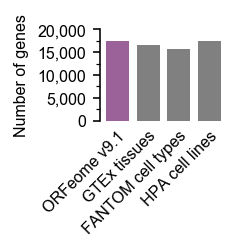

In [5]:
# plot a bar plot comparing the absolute PC gene count in different datasets
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(1.7, 1.7)
colors = [HURI_COLOR, 'grey', 'grey', 'grey']
dataset_names = ['ORFeome v9.1','GTEx tissues','FANTOM cell types','HPA cell lines']
dataset_values = [len(space3),len(GTEx_genes),len(FANTOM_genes),len(HPA_genes)]
plt.bar(range(len(dataset_names)),dataset_values,width=0.75,color=colors)
plt.ylabel('Number of genes')
plt.ylim([0,20000])
plt.xticks(range(len(dataset_names)),
           dataset_names,
           horizontalalignment='right',
           rotation_mode='anchor',
           rotation=45)
ax.set_yticks(range(0,22500,5000))
ax.set_yticks(range(2500,22500,5000), minor=True)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(length=0.)
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/genome_coverage_comparison' + fmt)

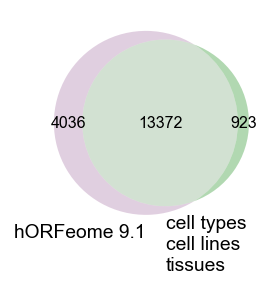

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(3, 2)
venn2([space3, 
       GTEx_genes.intersection(FANTOM_genes).intersection(HPA_genes)],
      set_colors=[HURI_COLOR, 'green'],
      set_labels=['hORFeome 9.1', 'cell types\ncell lines\ntissues'],
      ax=ax,
      alpha=0.3)
for fmt in FORMATS:
    plt.savefig('../figures/venn_spaceIII_vs_intersection_of_others' + fmt,
                bbox_inches='tight')